In [7]:
from __future__ import division, print_function, absolute_import, unicode_literals

# Python imports
import numpy  # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
import seaborn
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
numpy.random.seed(seed=1)

from matplotlib import animation, rc
from IPython.display import HTML, Image

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# Define the vector of input samples as x, with 20 values sampled from a uniform distribution
# between 0 and 1
x = numpy.random.uniform(0, 1, 20)

# Generate the target values t from x with small gaussian noise so the estimation won't
# be perfect.
# Define a function f that represents the line that generates t without noise
def f(x): return x * 2

# Create the targets t with some gaussian noise
noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = numpy.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

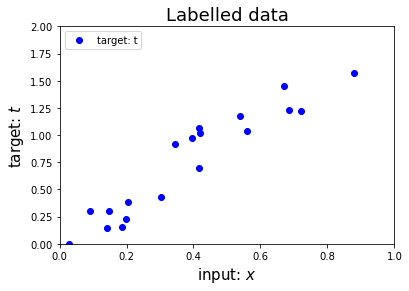

In [9]:
# Plot the target t versus the input x
plt.plot(x, t, 'bo', label='target: t')
plt.xlabel('input: $x$', fontsize=15)
plt.ylabel('target: $t$', fontsize=15)
plt.ylim([0,2])
plt.xlim([0,1])
plt.title('Labelled data', fontsize=18)
plt.legend(loc=2)
plt.show()

Iteration: 100 and 4

[0 1]
[[0.49612471]]


[1 0]
[[0.51049587]]


[1 1]
[[0.62300706]]


[0 0]
[[0.37916032]]


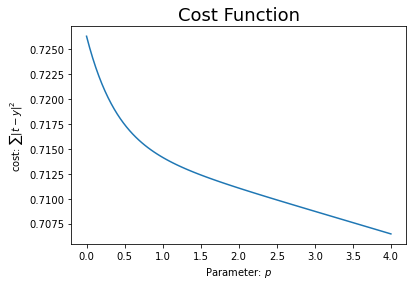

In [54]:
x = x.reshape(x.shape[0],1)
t = t.reshape(t.shape[0],1)
num_i_units = 2
num_h_units = 2
num_o_units = 1

learning_rate = 0.1 
reg_param = 0 
max_iter = 100 
m = 4


np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 2x2
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2

B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) 

    z2 = W1.dot(a1) + B1
    a2 = sigmoid(z2) 

    z3 = W2.dot(a2) + B2 
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

dW1 = 0
dW2 = 0

dB1 = 0
dB2 = 0

cost = np.zeros((max_iter, 1))
def compute_cost(predictions, targets):
    return -np.mean(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))

for i in range(max_iter):
    c = 0

    dW1 = 0
    dW2 = 0

    dB1 = 0
    dB2 = 0
    for j in range(m):
        sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

        # Forward Prop.
        a0 = X[j].reshape(X[j].shape[0], 1) 

        z1 = W1.dot(a0) + B1 
        a1 = sigmoid(z1) 

        z2 = W2.dot(a1) + B2 
        a2 = sigmoid(z2) 

        # Back prop.
        dz2 = a2 - y[j] 
        dW2 += dz2 * a1.T 

        dz1 = np.multiply((W2.T * dz2), sigmoid(a1, derv=True)) 
        dW1 += dz1.dot(a0.T) 

        dB1 += dz1 
        dB2 += dz2 

        c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
        sys.stdout.flush() 
    W1 = W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * W1)
    W2 = W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * W2)

    B1 = B1 - learning_rate * (dB1 / m)
    B2 = B2 - learning_rate * (dB2 / m)
    cost[i] = (c / m) + ( 
        (reg_param / (2 * m)) * 
        (
            np.sum(np.power(W1, 2)) + 
            np.sum(np.power(W2, 2))
        )
    )
for x in X:
    print("\n")
    print(x)
    print(forward(x, predict=True))
    
ws = numpy.linspace(0, 4, num=100)  # weight values
cost_ws = numpy.vectorize(lambda w: compute_cost(forward(x_reshaped, predict=True) , t))(ws)
plt.plot(ws, cost)
plt.xlabel("Parameter: $p$")
plt.ylabel("cost: $\sum |t-y|^2$")
plt.title('Cost Function', fontsize=18)
plt.show()

In [50]:
def init_fig():
    """Initialize figure"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    # Line vs data plot
    ax2.plot(x_reshaped, t_reshaped, 'bo', label='target: t')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 2])
    ax2.set_xlabel('input: $x$', fontsize=15)
    ax2.set_ylabel('target: $t$', fontsize=15)
    ax2.yaxis.set_label_position('right')
    ax2.set_title('Labelled data & model output', fontsize=18)
    line2, = ax2.plot([], [], 'k-', label='fitted line: $y=x*p$')
    ax2.legend(loc=2)
    # Cost function plot
    ax1.plot(ws, cost_ws, 'r-', label='cost')
    ax1.set_ylim([0, 14])
    ax1.set_xlim([0, 4])
    ax1.set_xlabel('parameter: $p$', fontsize=15)
    ax1.set_ylabel('cost: $\sum |t-y|^2$', fontsize=15)
    cost_text = ax1.set_title('Cost at step {}'.format(0), fontsize=18)
    line1, = ax1.plot([], [], 'k:', label='derivative at $p$')
    pc_dots, = ax1.plot([], [], 'ko')
    ax1.legend(loc=2)
    return fig, ax1, ax2, line1, line2, pc_dots, cost_text


def get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights):
    """Return animation function"""
    xs = np.linspace(0, 4, num=100)  # weight values

    def anim(i):
        """Animate step i"""
        if i == 0:
            return [line1, line2, pc_dots, cost_text]
        (w, dw, cost) = weights[i-1]
        cost_text.set_text('Cost at step {} = {:.3f}'.format(i, cost))
        ws, _, cs = zip(*weights[0:i])
        pc_dots.set_xdata(ws)
        pc_dots.set_ydatya(cs)
        abline_values = [dw * (x - w) + cost for x in xs]
        line1.set_xdata(xs)
        line1.set_ydata(abline_values)
        # Plot fit
        line2.set_xdata([0, 1])
        line2.set_ydata([0*w, 1*w])
        ax2.legend(loc=2)
        return [line1, line2, pc_dots, cost_text]

    return anim

In [51]:
def gradient(w, x, t):
    x_reshaped = x.reshape(x.shape[0], 1)
    t_reshaped = t.reshape(t.shape[0], 1)
    predictions = forward(x_reshaped, predict=True)
    return 2 * x_reshaped * (predictions - t_reshaped)

def delta_w(w_k,x,t,learning_rate):
    return learning_rate *gradient(w_k,x_reshaped,t_reshaped).sum()
w = 0.3
learning_rate = 0.05
nb_of_iterations = 1

x_reshaped = x.reshape(x.shape[0], 1)
t_reshaped = t.reshape(t.shape[0], 1)
x_reshaped = x_reshaped[:2]
t_reshaped = t_reshaped[:2]
w_cost = [(w, compute_cost(forward(x_reshaped, predict=True), t_reshaped))]
weights = [(w, gradient(w, x_reshaped, t_reshaped).sum(), compute_cost(forward(x_reshaped, predict=True), t_reshaped))]

for i in range(nb_of_iterations):
    dw = delta_w(w, x_reshaped, t_reshaped, learning_rate)
    w -= dw
    gw = gradient(w, x_reshaped, t_reshaped).sum()
    c = compute_cost(forward(x_reshaped, predict=True), t_reshaped)
    w_cost.append((w, c))
    weights.append((w, gw, c))


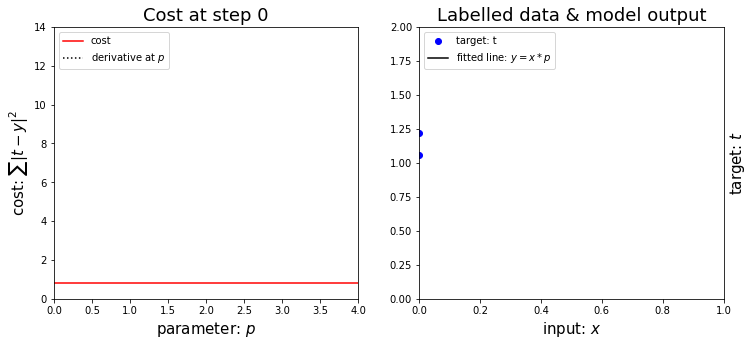

In [55]:
# Create animation (uses ffmpeg)
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig()
animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)

anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=800, blit=True)